<a href="https://colab.research.google.com/github/cyborgx0x/ai-resources/blob/main/Dora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

# Transformer Encoder Layer
class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward, dropout=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, dim_feedforward),
            nn.ReLU(),
            nn.Linear(dim_feedforward, d_model)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
        src2 = self.self_attn(src, src, src)[0]
        src = src + self.dropout(src2)
        src = self.norm1(src)
        src2 = self.feed_forward(src)
        src = src + self.dropout(src2)
        src = self.norm2(src)
        return src

# Transformer Encoder
class TransformerEncoder(nn.Module):
    def __init__(self, num_layers, d_model, nhead, dim_feedforward, dropout=0.1):
        super(TransformerEncoder, self).__init__()
        encoder_layers = [TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout) for _ in range(num_layers)]
        self.encoder = nn.Sequential(*encoder_layers)

    def forward(self, src):
        return self.encoder(src)

# Example usage
d_model = 512
nhead = 8
dim_feedforward = 2048
num_layers = 6
dropout = 0.1

# Create a Transformer Encoder
encoder = TransformerEncoder(num_layers, d_model, nhead, dim_feedforward, dropout)

# Input data (batch_size, sequence_length, d_model)
input_data = torch.randn(64, 20, d_model)

# Forward pass through the Transformer Encoder
output = encoder(input_data)

print("Input shape:", input_data.shape)
print("Output shape:", output.shape)


Input shape: torch.Size([64, 20, 512])
Output shape: torch.Size([64, 20, 512])


In [2]:
output

tensor([[[-0.0139,  0.8545, -0.7068,  ...,  0.6641, -0.3143, -0.2923],
         [ 0.2339, -0.4133, -0.9518,  ...,  0.5721,  1.2003, -1.3061],
         [-1.1030,  1.9347,  2.2691,  ..., -0.0179, -0.8216, -0.7187],
         ...,
         [-0.7892, -1.2245,  1.0740,  ...,  0.1568,  0.7171, -0.2822],
         [-1.7963, -0.5028,  0.3921,  ...,  0.7665, -0.2996, -1.7582],
         [-2.4838, -0.9078,  0.8984,  ..., -1.2333,  0.5882,  0.1788]],

        [[-2.4267,  0.2237, -0.4580,  ...,  0.8302, -1.1847, -0.4490],
         [-0.0203, -1.4386, -0.6680,  ...,  0.1567, -0.7015, -0.1183],
         [-1.3083,  0.8586,  0.2094,  ...,  0.6625, -0.8445, -1.1805],
         ...,
         [ 0.7975, -0.1029, -0.3853,  ...,  0.7752,  1.2238,  0.4952],
         [ 1.3483, -0.5947, -0.5905,  ...,  0.3817,  1.5105,  0.6956],
         [-2.2890,  1.6490,  0.2945,  ..., -0.1354,  1.4039,  0.3567]],

        [[-0.3118, -0.3506, -1.3435,  ..., -1.2020, -0.1497,  0.0778],
         [-1.9191, -0.1921, -1.1249,  ...,  0

Episode: 1, Total Reward: -1594.3477305703507
Episode: 2, Total Reward: -1826.9803214299347
Episode: 3, Total Reward: -1572.4935492481
Episode: 4, Total Reward: -1681.1283098797364
Episode: 5, Total Reward: -1165.8641277978747
Episode: 6, Total Reward: -950.0016996820032
Episode: 7, Total Reward: -1058.3980498262708
Episode: 8, Total Reward: -1378.3746538455098
Episode: 9, Total Reward: -1356.706287394475
Episode: 10, Total Reward: -1447.8693218727599
Episode: 11, Total Reward: -1431.3927944075203
Episode: 12, Total Reward: -1863.9572527788323
Episode: 13, Total Reward: -1531.9196424483318
Episode: 14, Total Reward: -1475.8648573651074
Episode: 15, Total Reward: -1209.2801300737367
Episode: 16, Total Reward: -1078.9336048847306
Episode: 17, Total Reward: -1568.6103620081249
Episode: 18, Total Reward: -1649.5877353163166
Episode: 19, Total Reward: -1364.583185512099
Episode: 20, Total Reward: -1628.13795726937
Episode: 21, Total Reward: -1886.938570619582
Episode: 22, Total Reward: -190

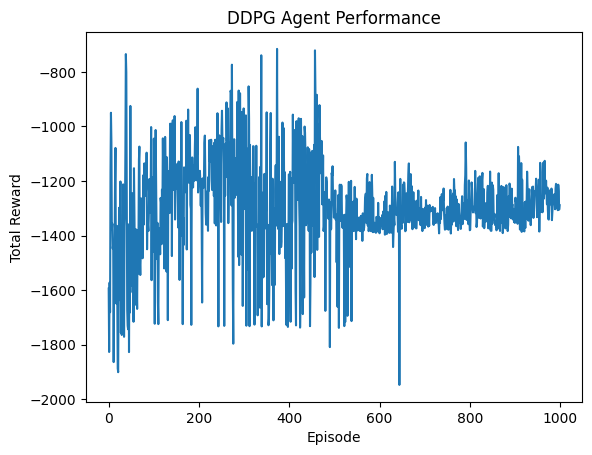

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import gym

# Define the actor and critic networks
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, action_dim)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        action = torch.tanh(self.fc3(x))  # Scales the action to [-1, 1]
        return action

class Critic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_dim + action_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, state, action):
        # Ensure that action has the same number of dimensions as state
        if len(action.shape) < len(state.shape):
            action = action.unsqueeze(-1)  # Add a new dimension

        x = torch.cat([state, action], dim=-1)  # Concatenate along the last dimension
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        value = self.fc3(x)
        return value

# Define the DDPG agent
class DDPGAgent:
    def __init__(self, state_dim, action_dim):
        self.actor = Actor(state_dim, action_dim)
        self.actor_target = Actor(state_dim, action_dim)
        self.critic = Critic(state_dim, action_dim)
        self.critic_target = Critic(state_dim, action_dim)

        # Initialize target networks with the same weights as online networks
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.critic_target.load_state_dict(self.critic.state_dict())

        # Define optimizers for actor and critic
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=0.001)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=0.001)

        # Hyperparameters
        self.gamma = 0.99
        self.tau = 0.005

    def select_action(self, state):
        state = torch.FloatTensor(state)
        action = self.actor(state).detach().numpy()
        return action

    def train(self, state, action, reward, next_state, done):
        state = torch.FloatTensor(state)
        action = torch.FloatTensor(action)
        reward = torch.FloatTensor([reward])
        next_state = torch.FloatTensor(next_state)

        # Update critic
        next_action = self.actor_target(next_state).detach()
        target_value = reward + self.gamma * self.critic_target(next_state, next_action) * (1 - done)
        predicted_value = self.critic(state, action)
        critic_loss = nn.MSELoss()(predicted_value, target_value)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # Update actor
        actor_loss = -self.critic(state, self.actor(state)).mean()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # Soft update target networks
        self.soft_update(self.actor, self.actor_target)
        self.soft_update(self.critic, self.critic_target)

    def soft_update(self, online_net, target_net):
        for target_param, online_param in zip(target_net.parameters(), online_net.parameters()):
            target_param.data.copy_(self.tau * online_param.data + (1.0 - self.tau) * target_param.data)

# Create an environment (e.g., Pendulum-v0)
env = gym.make('Pendulum-v1')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

# Initialize the DDPG agent
agent = DDPGAgent(state_dim, action_dim)

# Training loop
import matplotlib.pyplot as plt

# ...

# Training loop
episode_rewards = []  # To store the rewards obtained in each episode

for episode in range(1000):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.train(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    episode_rewards.append(total_reward)  # Store the total reward for this episode
    print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

# Close the environment
env.close()

# Plot the performance
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('DDPG Agent Performance')
plt.show()

